num_cols 5


<AxesSubplot:>

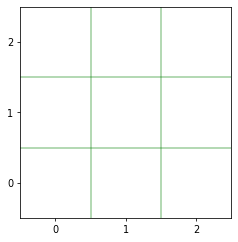

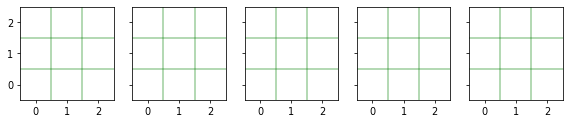

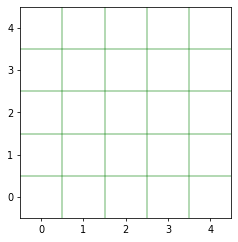

In [2]:



# FIELD PART

import matplotlib.pyplot as plt
import math 

def flatten(t):
    if len(t) > 0:
        if hasattr(t[0], '__iter__'):
            return [item for sublist in t for item in sublist]
    return t

def draw_field(x=0, y=0, size=3, *, dpi=70, ax=None):
    LINE_WIDTH = 2
    ALPHA = 0.3

    if not ax:
        f, ax = plt.subplots(1, 1)
    else:
        f = ax.figure   
    
    
    ax.set_ylim(0, size)
    ax.set_xlim(0, size)
    ax.set_box_aspect(1)

    f.figsize=(1, 1)
    f.dpi=dpi
    line_h1_x = [0, 3]
    line_h1_y = [1, 1]
    # hor lines
    for i in range(1, size):
        line_x = [0, size]
        line_y = [i, i]
        ax.plot(line_x, line_y, 'g', linewidth=LINE_WIDTH, alpha=ALPHA)
    # ver lines
    for i in range(1, size):
        line_x = [i, i]
        line_y = [0, size]
        ax.plot(line_x, line_y, 'g', linewidth=LINE_WIDTH, alpha=ALPHA)

    # xtickpabels = ax.get_xticklabels()
    # print('xtickpabels', xtickpabels)
    # TODO: automate
    tick_labels = list(range(size))
    shift = 0.5
    ticks = [t + shift for t in range(size)]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(tick_labels)
    ax.set_yticklabels(tick_labels)
    return ax

def get_n_axes(num, max_cols=5, fig_size = 5):
    num_cols = num if num < max_cols else max_cols
    num_rows = math.ceil(num / num_cols)

    print('num_cols', num_cols)

    f, ax_ax = plt.subplots(num_rows, num_cols, sharex=True, sharey=True)
    axses = flatten(ax_ax)

    # hide excess
    full_num = num_cols * num_rows
    for idx in range(num, full_num):
        ax = axses[idx]
        ax.axis('off')

    fig = axses[0].figure
    return axses[0: num]

# simple field
draw_field(0, 0, size = 3)

# group of fields
num_fields = 5
num_cols = 5
axes = get_n_axes(num_fields, num_cols)

for ax in axes:
    draw_field(ax=ax)

# fit size
fig = axes[0].figure
fig_size = 2
full_fig_width = num_cols * fig_size
fig.set_size_inches(full_fig_width, fig_size, forward=True)

# custom size
draw_field(0, 0, size = 5)

<AxesSubplot:>

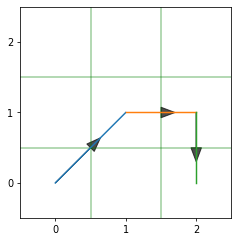

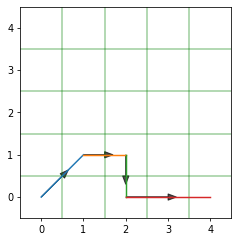

In [11]:
# PATH PART
POINTS_SHIFT = 0.5

def get_shited_points(p):
    return [el + POINTS_SHIFT for el in p]

def draw_path(points, *, ax = None, field_size=3):
    if not ax:    
        ax = draw_field(size=field_size)

    for idx, p in enumerate(points):
        if idx == 0:
            continue
        prev_p = points[idx - 1]
        x1, y1 = get_shited_points(prev_p)
        x2, y2 = get_shited_points(p)
        xdir = (x2 - x1) * 0.5
        ydir = (y2 - y1) * 0.5
        ax.plot([x1, x2], [y1, y2])
        ax.arrow(x1, y1, xdir, ydir, head_width=0.15, head_length=0.2, fc='k', ec='k', alpha=0.7, width=0.0)
    return ax

# draw for 3
points = [[0,0], [1, 1], [2, 1], [2, 0]]
draw_path(points)

# draw for 5
points = [[0,0], [1, 1], [2, 1], [2, 0], [4, 0]]
draw_path(points, field_size=5)

<AxesSubplot:>

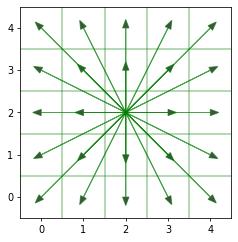

In [12]:
# DIRECTIONS PART
DIRECTIONS = {
  "UP":     [0, 1],
  "RIGHT":  [1, 0],
  "DOWN":   [0, -1],
  "LEFT":   [-1, 0],
  
  "UR":     [1, 1],
  "DR":     [1, -1],
  "DL":     [-1, -1],
  "UL":     [-1, 1],

  "UUR":    [1, 2],
  "DRR":    [2, -1],
  "DDL":    [-1,-2],
  "ULL":    [-2, 1],

  "URR":    [2, 1],
  "DDR":    [1, -2],
  "DLL":    [-2,-1],
  "UUL":    [-1, 2],

  "UU":     [0, 2],
  "RR":     [2, 0],
  "DD":     [0, -2],
  "LL":     [-2, 0],

  "UURR":   [2, 2],
  "DDRR":   [2, -2],
  "DDLL":   [-2, -2],
  "UULL":   [-2, 2],
}

def draw_dirs(dirs, center_point=[2,2], field_size = 5, *, ax=None):
    if not ax:
        ax = draw_field(0, 0, field_size)

    centerx, centery = center_point

    for dir in dirs:
        cx = centerx + POINTS_SHIFT
        cy = centery + POINTS_SHIFT
        xdir, ydir = dir
        ax.arrow(cx, cy, xdir, ydir, head_width=0.15, head_length=0.2, fc='k', ec='g', alpha=0.7)
    return ax

draw_dirs(DIRECTIONS.values())

<AxesSubplot:>

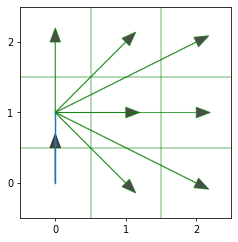

In [13]:
# GET DIRECTIONS PART
def get_available_directions(point, path, field_size=2):
    result = []
    x, y = point
    for dir in DIRECTIONS.values():
        dx, dy = dir
        tx = x + dx
        ty = y + dy
        
        if tx < 0 or tx > field_size:
            continue
        if ty < 0 or ty > field_size:
            continue
        if [tx, ty] in path:
            continue
        
        result += [dir]

    return result

path = [[0, 0], [0, 1]]
last_point = path[-1]
dirs1 = get_available_directions(last_point, path, 2)
sx, sy = last_point
ax = draw_path(path)
draw_dirs(dirs1, last_point, 5, ax=ax)




Number of paths 8


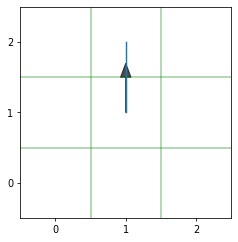

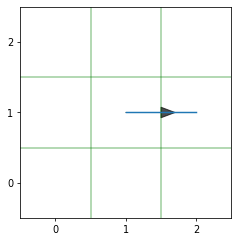

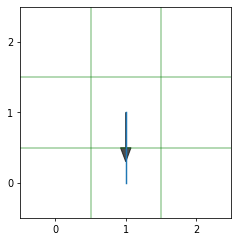

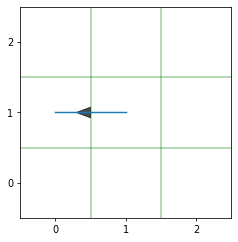

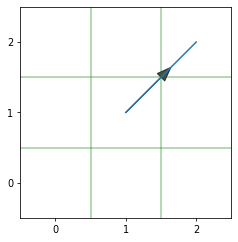

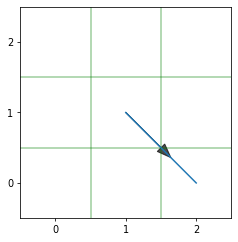

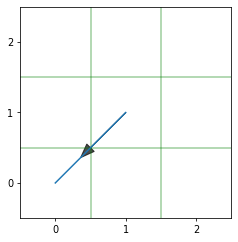

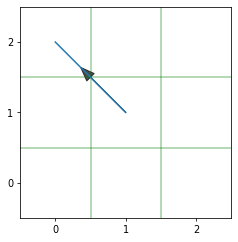

In [14]:
def get_paths_from_point(point, len=3, field_size=3):
    paths = [[point]]
        
    for i in range(len-1):
        next_generation_paths = []
        for path in paths:
            last_point = path[-1]
            cx, cy = last_point
            av_dirs = get_available_directions(last_point, path, field_size - 1)
            child_paths = []
            for dir in av_dirs:
                dx, dy = dir
                tx = cx + dx
                ty = cy + dy
                next_path = path + [[tx, ty]]
                child_paths += [next_path]
            next_generation_paths += child_paths
        paths = next_generation_paths
    return paths

paths = get_paths_from_point([1, 1], len=2)
print(f'Number of paths {len(paths)}')

for path in paths[:2]:
    draw_path(path)



Number of paths 8
num_cols 6


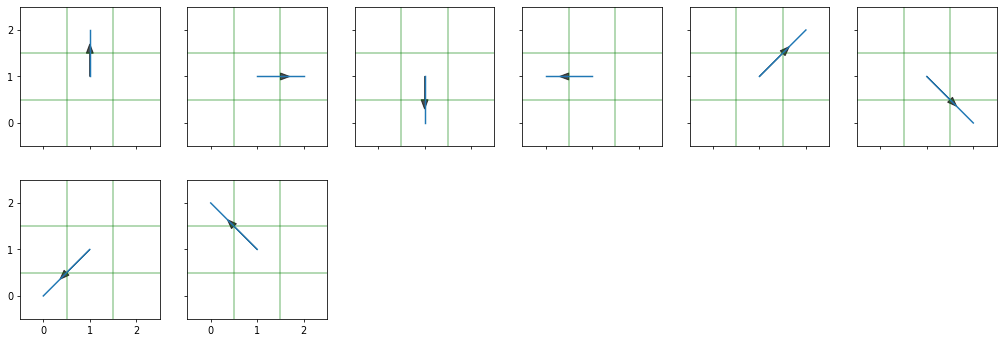

In [7]:
# DRAW GRID
import math

def graw_pats_grid(paths, field_size=3):
    num_fields = len(paths)
    num_cols = 6
    num_rows = math.ceil(num_fields / num_cols)
    axes = get_n_axes(num_fields, num_cols)

    for idx, path in enumerate(paths):
        ax = axes[idx]
        draw_field(path, ax=ax, size=field_size)
        draw_path(path, ax=ax, field_size=field_size)

    # fit size
    fig = axes[0].figure
    fig_size = 3
    full_fig_width = num_cols * fig_size
    full_fig_height = num_rows * fig_size
    fig.set_size_inches(full_fig_width, full_fig_height, forward=True)

paths = get_paths_from_point([1, 1], len=2)
print(f'Number of paths {len(paths)}')
graw_pats_grid(paths)

Number of paths 23040
num_cols 6


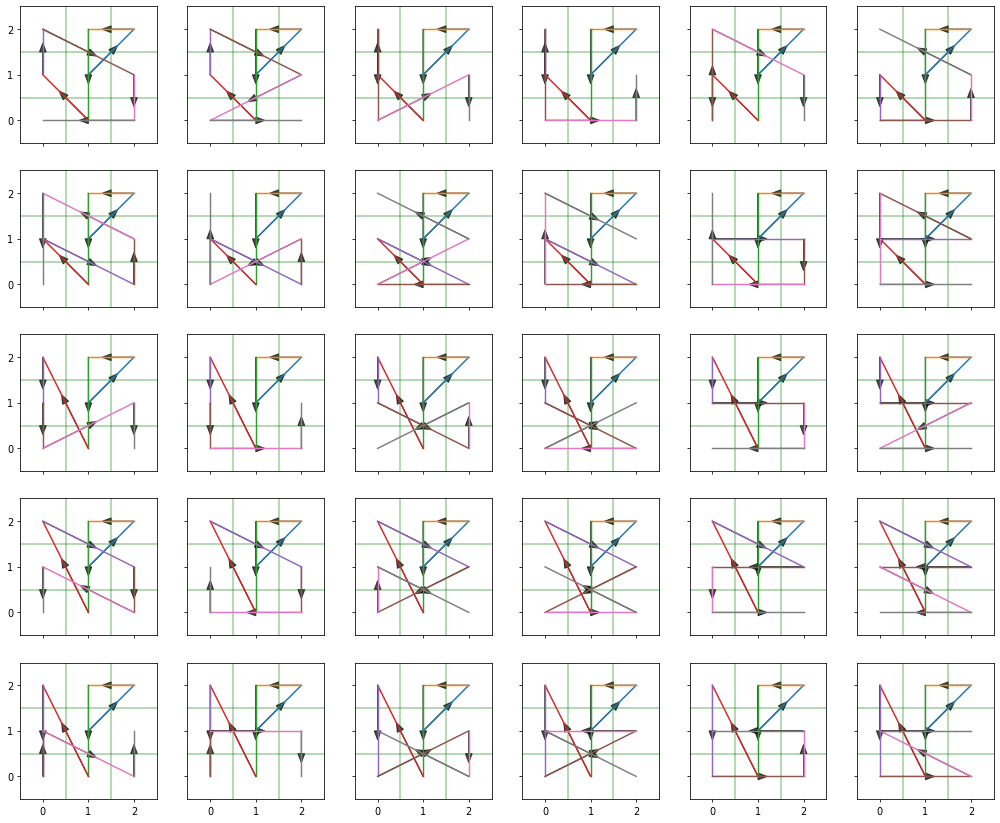

In [8]:

paths = get_paths_from_point([1, 1], len=9)
print(f'Number of paths {len(paths)}')
middle = int(len(paths)/2)
graw_pats_grid(paths[middle-30:middle])

Number of paths 26640
num_cols 6


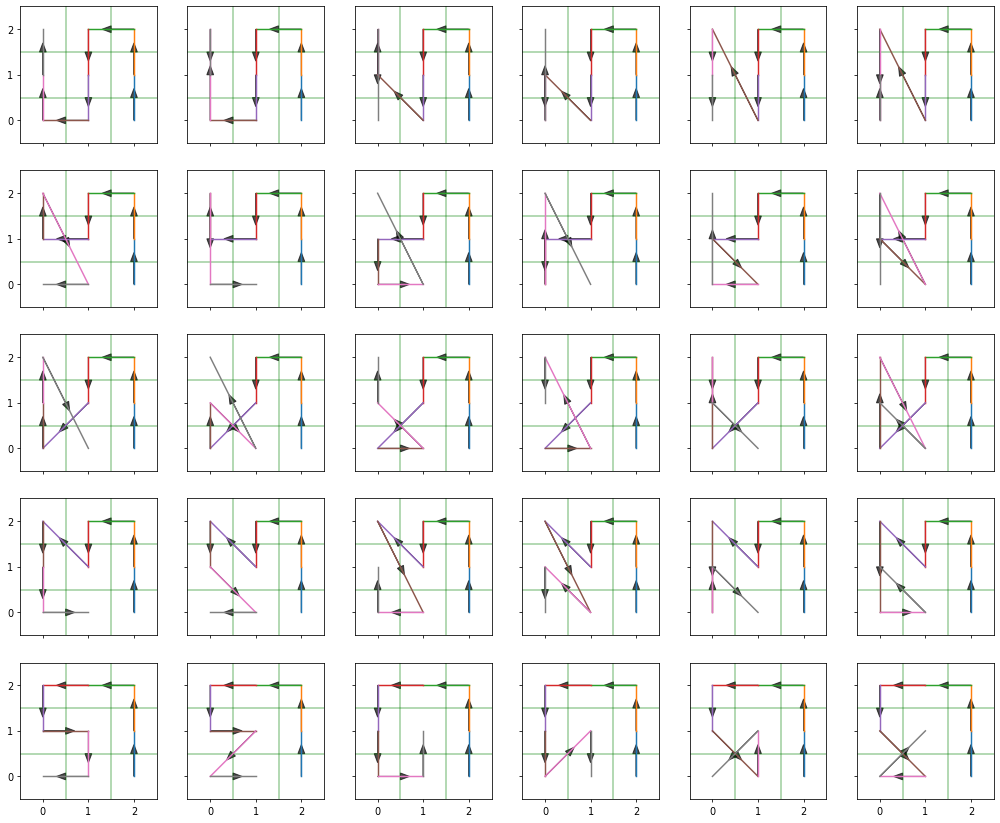

In [9]:

paths = get_paths_from_point([2, 0], len=9)
print(f'Number of paths {len(paths)}')
graw_pats_grid(paths[0:30])